## Gaussian Mixture Model

This Jupyter notebook aims to illustrate the Gaussian Mixture Model algorithm

[[0.1090666 ]
 [0.49616612]
 [0.99915195]
 [1.50252785]
 [2.0105816 ]]


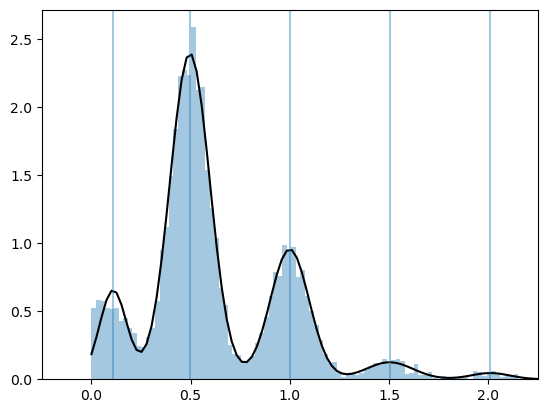

In [32]:
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
import pandas as pd

# Creating a sample dataset with multimodal distribution
nb_comp = 5

n_samples = 10000

data = np.concatenate((abs(np.random.normal(0.1, 0.1, int(0.1 * n_samples))),
                       np.random.normal(0.5, 0.1, int(0.5 * n_samples)),
                       np.random.normal(1, 0.1, int(0.2 * n_samples)),
                       np.random.normal(1.5, 0.1, int(0.03 * n_samples)),
                       np.random.normal(2.0, 0.1, int(0.01 * n_samples))
                      ))[:, np.newaxis]

# # Fit a Gaussian Mixture Model with two components
init_means = [[0.5*(i+1)] for i in range(nb_comp)]
init_means = [[0.1], [0.5], [1.0], [1.5], [2.0]]
clf = mixture.GaussianMixture(n_components=nb_comp, covariance_type='full', means_init = init_means)
clf.fit(data)

print(clf.means_)

# Display the data
x = np.linspace(0, 2.5, 100)
logprob = clf.score_samples(x.reshape(-1,1))
log_likelihood = clf.score(data)
pdf = np.exp(logprob)
plt.plot(x, pdf, '-k')
plt.hist(data, 100, density=True, histtype='stepfilled', alpha=0.4)
plt.xlim([-0.25, 2.25])

for mean in clf.means_:
    plt.axvline(mean, alpha = 0.4)
    
plt.show()


In [33]:
weights = clf.weights_
means = clf.means_
covariances = clf.covariances_

print(weights)
print(means)
print(covariances)
print(log_likelihood)

[0.11240955 0.60381849 0.23525565 0.03718314 0.01133318]
[[0.1090666 ]
 [0.49616612]
 [0.99915195]
 [1.50252785]
 [2.0105816 ]]
[[[0.00470596]]

 [[0.01012393]]

 [[0.00966019]]

 [[0.01411263]]

 [[0.00975851]]]
-0.10590098328217569
